In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


Load datasets into "train_data" and "test_data"

In [2]:
train_data = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
train_data.info()
train_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [3]:
test_data = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
test_data.info()
test_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [4]:
train_data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [5]:
train_numerical = train_data[['Age','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',]]
train_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           8514 non-null   float64
 1   RoomService   8512 non-null   float64
 2   FoodCourt     8510 non-null   float64
 3   ShoppingMall  8485 non-null   float64
 4   Spa           8510 non-null   float64
 5   VRDeck        8505 non-null   float64
dtypes: float64(6)
memory usage: 407.6 KB


In [6]:
pd.pivot_table(data=train_data, index="Transported", values=['Age','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',] )

,Age,FoodCourt,RoomService,ShoppingMall,Spa,VRDeck
Transported,,,,,,
False,29.922858,382.615930,389.266066,167.566217,564.382666,543.629822
True,27.748834,532.691984,63.098021,179.829972,61.675531,69.148131


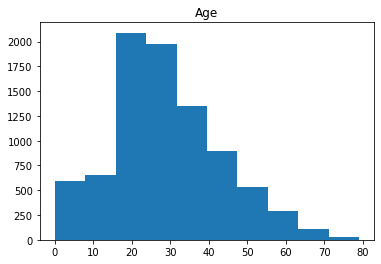

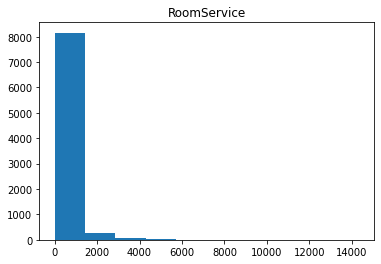

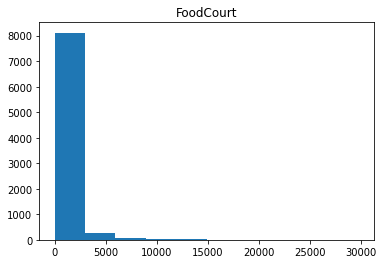

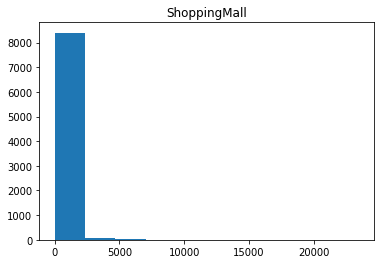

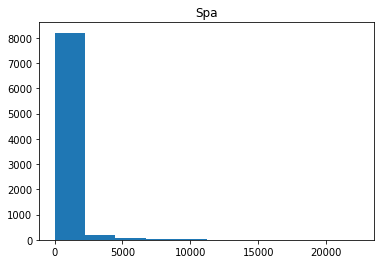

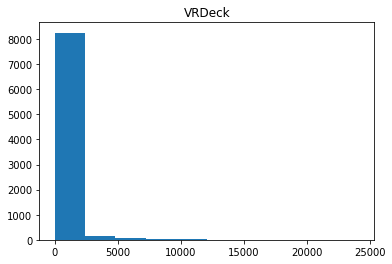

In [7]:
for i in train_numerical:
    plt.hist(train_numerical[i])
    plt.title(i)
    plt.show()

In [8]:
train_numerical.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000


<AxesSubplot:>

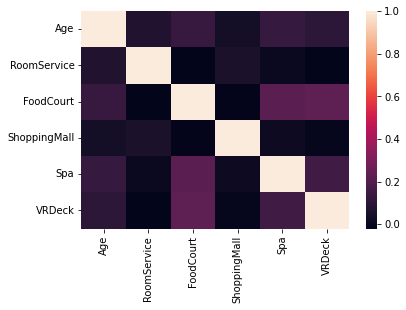

In [9]:
sns.heatmap(train_numerical.corr())

Look at categorical values

In [10]:
train_categorical = train_data[['HomePlanet', 'CryoSleep','Destination','VIP', 'Transported']]
train_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   HomePlanet   8492 non-null   object
 1   CryoSleep    8476 non-null   object
 2   Destination  8511 non-null   object
 3   VIP          8490 non-null   object
 4   Transported  8693 non-null   bool  
dtypes: bool(1), object(4)
memory usage: 280.3+ KB


Plot counts of different categorical values

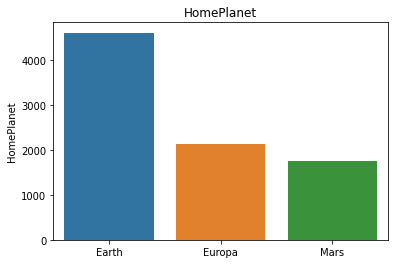

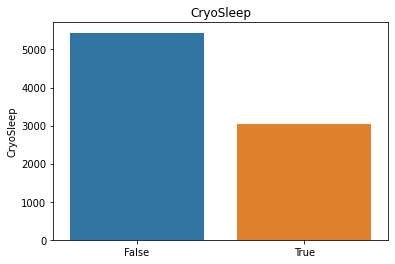

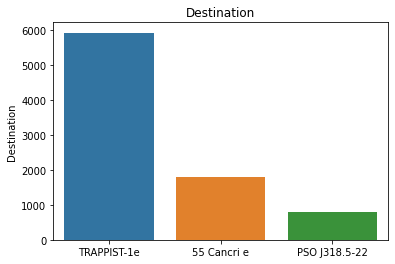

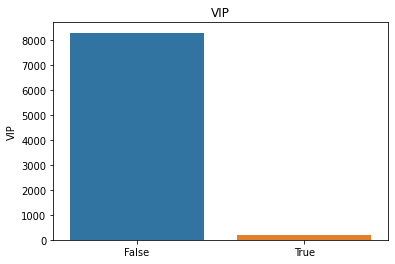

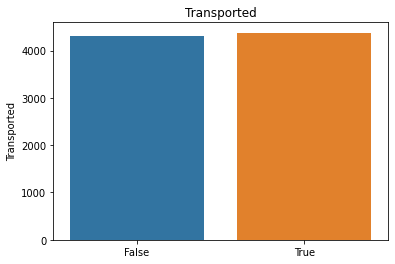

In [11]:
for i in train_categorical:
    sns.barplot(x=train_categorical[i].value_counts().index, y=train_categorical[i].value_counts()).set_title(i)
    plt.show()

Plot transported status relative to categorical values

In [12]:
# Pivot table showing difference of transport numbers vs. home planet
pd.pivot_table(data=train_data, index="Transported", columns='HomePlanet', values="PassengerId", aggfunc="count")

HomePlanet,Earth,Europa,Mars
Transported,,,
False,2651,727,839
True,1951,1404,920


In [13]:
# Pivot table showing difference of transport numbers vs. cryo sleep status
pd.pivot_table(data=train_data, index="Transported", columns='CryoSleep', values="PassengerId", aggfunc="count")

CryoSleep,False,True
Transported,,
False,3650,554
True,1789,2483


In [14]:
# Pivot table showing difference of transport numbers vs. destination
pd.pivot_table(data=train_data, index="Transported", columns='Destination', values="PassengerId", aggfunc="count")

Destination,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
Transported,,,
False,702,395,3128
True,1098,401,2787


In [15]:
# Pivot table showing difference of transport numbers vs. VIP status
pd.pivot_table(data=train_data, index="Transported", columns='VIP', values="PassengerId", aggfunc="count")

VIP,False,True
Transported,,
False,4093,123
True,4198,76


**Look at name data**

In [16]:
train_data["Name"]

0         Maham Ofracculy
1            Juanna Vines
2           Altark Susent
3            Solam Susent
4       Willy Santantines
              ...        
8688    Gravior Noxnuther
8689      Kurta Mondalley
8690         Fayey Connon
8691     Celeon Hontichre
8692     Propsh Hontichre
Name: Name, Length: 8693, dtype: object

Look at the length of the name vs. transported

In [17]:
train_data["name_length"] = train_data["Name"].apply(lambda x: len(x) if type(x) == str else "n")
train_data["name_length"].value_counts()

16    1188
14    1126
15    1110
17     975
12     967
13     956
11     721
10     538
18     456
9      319
n      200
8      111
7       26
Name: name_length, dtype: int64

In [18]:
# Pivot table showing difference of transport numbers vs. length of their name
pd.pivot_table(data=train_data, index="Transported", columns='name_length', values="PassengerId", aggfunc="count")

name_length,7,8,9,10,11,12,13,14,15,16,17,18,n
Transported,,,,,,,,,,,,,
False,14,60,146,246,369,510,502,541,551,568,478,231,99
True,12,51,173,292,352,457,454,585,559,620,497,225,101


Look if there is a different for individuals with middle names (doesn't appear to be the case)

In [19]:
train_data["name_words"] = train_data["Name"].apply(lambda x: len(x.split() if type(x) == str else "n"))
train_data["name_words"].value_counts()

2    8493
1     200
Name: name_words, dtype: int64

Look to see if there is a correlation with passenger names

In [20]:
train_data["name_start"] = train_data["Name"].apply(lambda x: str(x)[0])
train_data["name_start"].value_counts()

A    920
S    656
C    642
M    578
T    504
B    494
E    467
G    462
D    444
L    433
J    404
R    345
H    344
W    298
P    294
K    259
N    216
F    211
n    200
I    164
V    133
O     82
Z     60
Y     44
Q     22
U     17
Name: name_start, dtype: int64

In [21]:
# Pivot table showing difference of transport numbers vs. starting letter in their name
ptable = pd.pivot_table(data=train_data, index="Transported", columns='name_start', values="PassengerId", aggfunc="count")
ptable

name_start,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,Y,Z,n
Transported,,,,,,,,,,,,,,,,,,,,,
False,421,256,315,226,245,105,231,165,88,204,...,11,182,300,282,7,78,149,24,17,99
True,499,238,327,218,222,106,231,179,76,200,...,11,163,356,222,10,55,149,20,43,101


**Cabin analysis**

In [22]:
train_data["cabin_letter"] = train_data["Cabin"].apply(lambda x: str(x)[0])
train_data["cabin_letter"].value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
n     199
T       5
Name: cabin_letter, dtype: int64

In [23]:
pd.pivot_table(data=train_data, index="Transported", columns='cabin_letter', values="PassengerId", aggfunc="count")

cabin_letter,A,B,C,D,E,F,G,T,n
Transported,,,,,,,,,
False,129,207,239,271,563,1565,1238,4,99
True,127,572,508,207,313,1229,1321,1,100


Data pre-processing

In [24]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  name_length   8693 non-null   object 
 15  name_words    8693 non-null   int64  
 16  name_start    8693 non-null   object 
 17  cabin_letter  8693 non-null   object 
dtypes: bool(1), float64(6), int6

In [25]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [26]:
# Fill cryosleep details (unlikely to have been unaccounted for in cryosleep)
train_data.CryoSleep = train_data.CryoSleep.fillna(False)
test_data.CryoSleep = test_data.CryoSleep.fillna(False)

In [27]:
# Fill VIP details (unlikely to have been unaccounted for in VIP)
train_data.VIP = train_data.VIP.fillna(False)
test_data.VIP = test_data.VIP.fillna(False)

In [28]:
# Fill age data in with the median age
train_data.Age = train_data.Age.fillna(train_data.Age.median())
test_data.Age = test_data.Age.fillna(train_data.Age.median())

In [29]:
#A lack of a balance due by the passengers likely means nothing was spent
bills = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
for i in bills:
    train_data[i] = train_data[i].fillna(0)
    test_data[i] = test_data[i].fillna(0)

In [30]:
train_data.dropna(subset=['HomePlanet'],inplace = True)
train_data.dropna(subset=['Destination'],inplace = True)
test_data.dropna(subset=['HomePlanet'],inplace = True)
test_data.dropna(subset=['Destination'],inplace = True)

In [31]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8314 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8314 non-null   object 
 1   HomePlanet    8314 non-null   object 
 2   CryoSleep     8314 non-null   bool   
 3   Cabin         8125 non-null   object 
 4   Destination   8314 non-null   object 
 5   Age           8314 non-null   float64
 6   VIP           8314 non-null   bool   
 7   RoomService   8314 non-null   float64
 8   FoodCourt     8314 non-null   float64
 9   ShoppingMall  8314 non-null   float64
 10  Spa           8314 non-null   float64
 11  VRDeck        8314 non-null   float64
 12  Name          8125 non-null   object 
 13  Transported   8314 non-null   bool   
 14  name_length   8314 non-null   object 
 15  name_words    8314 non-null   int64  
 16  name_start    8314 non-null   object 
 17  cabin_letter  8314 non-null   object 
dtypes: bool(3), float64(6), int6

In [32]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8314 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8314 non-null   object 
 1   HomePlanet    8314 non-null   object 
 2   CryoSleep     8314 non-null   bool   
 3   Cabin         8125 non-null   object 
 4   Destination   8314 non-null   object 
 5   Age           8314 non-null   float64
 6   VIP           8314 non-null   bool   
 7   RoomService   8314 non-null   float64
 8   FoodCourt     8314 non-null   float64
 9   ShoppingMall  8314 non-null   float64
 10  Spa           8314 non-null   float64
 11  VRDeck        8314 non-null   float64
 12  Name          8125 non-null   object 
 13  Transported   8314 non-null   bool   
dtypes: bool(3), float64(6), object(5)
memory usage: 803.8+ KB


In [33]:
train_data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'name_length', 'name_words', 'name_start',
       'cabin_letter'],
      dtype='object')

In [34]:
columns_for_dummies = ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','cabin_letter']

In [35]:
# Add cabin letter data
test_data["cabin_letter"] = test_data["Cabin"].apply(lambda x: str(x)[0])

In [36]:
train_dummies = pd.get_dummies(train_data[columns_for_dummies])
train_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8314 entries, 0 to 8692
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8314 non-null   bool   
 1   Age                        8314 non-null   float64
 2   VIP                        8314 non-null   bool   
 3   RoomService                8314 non-null   float64
 4   FoodCourt                  8314 non-null   float64
 5   ShoppingMall               8314 non-null   float64
 6   Spa                        8314 non-null   float64
 7   VRDeck                     8314 non-null   float64
 8   HomePlanet_Earth           8314 non-null   uint8  
 9   HomePlanet_Europa          8314 non-null   uint8  
 10  HomePlanet_Mars            8314 non-null   uint8  
 11  Destination_55 Cancri e    8314 non-null   uint8  
 12  Destination_PSO J318.5-22  8314 non-null   uint8  
 13  Destination_TRAPPIST-1e    8314 non-null   uint8

In [37]:
test_dummies = pd.get_dummies(test_data[columns_for_dummies])
test_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8314 entries, 0 to 8692
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8314 non-null   bool   
 1   Age                        8314 non-null   float64
 2   VIP                        8314 non-null   bool   
 3   RoomService                8314 non-null   float64
 4   FoodCourt                  8314 non-null   float64
 5   ShoppingMall               8314 non-null   float64
 6   Spa                        8314 non-null   float64
 7   VRDeck                     8314 non-null   float64
 8   HomePlanet_Earth           8314 non-null   uint8  
 9   HomePlanet_Europa          8314 non-null   uint8  
 10  HomePlanet_Mars            8314 non-null   uint8  
 11  Destination_55 Cancri e    8314 non-null   uint8  
 12  Destination_PSO J318.5-22  8314 non-null   uint8  
 13  Destination_TRAPPIST-1e    8314 non-null   uint8

In [38]:
X_train = train_dummies.copy()
X_test = test_dummies.copy()
y_train = train_data["Transported"]

In [39]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Transported': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
